In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression

### Prepare data

In [98]:
train_set = pd.read_csv('data/train_nx_ig_v3.csv')
train_set.head()

,id1,id2,res_allo_ind,overlap_title,temp_diff,comm_auth,reduced_tfidf_sim,jaccard_coeff,tgt_citation,labels
0,9510123,9502114,0.142857,2,0,0,0.242161,0.176471,8,1
1,9707075,9604178,0.226401,1,1,0,0.116740,0.106796,124,1
2,9312155,9506142,0.000000,0,-2,0,0.067705,0.000000,2,0
3,9911255,302165,0.000000,0,-4,0,0.054771,0.000000,2,0
4,9701033,209076,0.000000,0,-5,0,0.220903,0.000000,2,0


In [99]:
X_train1 = train_set.iloc[:,2:-1]
# X_train1 = train_set.iloc[:,2:-2] # without gaussien_sim
# X_train2 = train_set.iloc[:,[0,1,2,4,5,6,7,8]] # without gaussien_sim + tfidf_cos_sim
y_train = train_set.iloc[:,-1]

In [100]:
poly1 = PolynomialFeatures(degree=2)
X_train1_poly2 = poly1.fit_transform(X_train1)
# poly2 = PolynomialFeatures(degree=2)
# X_train2_poly2 = poly2.fit_transform(X_train2)

### CV

In [101]:
clf_lr = LogisticRegression(C=310)
scores_lr = cross_val_score(clf_lr, X_train1, y_train, cv=5, scoring='f1')
print (np.mean(scores_lr))
clf_lr_poly2 = LogisticRegression(C=310)
scores_lr_poly2 = cross_val_score(clf_lr_poly2, X_train1_poly2, y_train, cv=5, scoring='f1')
print (np.mean(scores_lr_poly2))

0.9872389120059177
0.883093247231751


### CV to choose C in LR

In [ ]:
## without gaussien_sim, without polynomial VS with polynomial

scores = []
scores_poly2 = []
c_range = range(1,500)
for i in c_range:
    clf_lr = LogisticRegression(C=i)
    scores_lr = cross_val_score(clf_lr, X_train1, y_train, cv=5, scoring='f1')
    scores.append(np.mean(scores_lr))
    clf_lr_poly2 = LogisticRegression(C=i)
    scores_lr_poly2 = cross_val_score(clf_lr_poly2, X_train1_poly2, y_train, cv=5, scoring='f1')
    scores_poly2.append(np.mean(scores_lr_poly2))

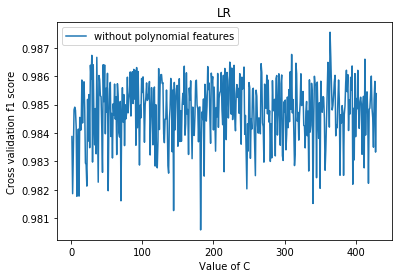

In [16]:
plt.plot(range(1,430), scores, label='without polynomial features')
# plt.plot(range(1,430), scores_poly2, label='with 2-degree polynomial features')
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

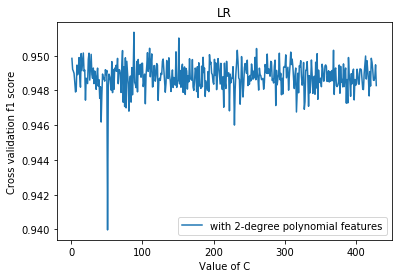

In [18]:
# plt.plot(range(1,430), scores, label='without polynomial features')
plt.plot(range(1,429), scores_poly2, label='with 2-degree polynomial features')
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

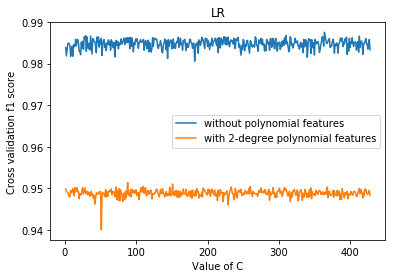

In [21]:
plt.plot(range(1,429), scores[:-1], label='without polynomial features')
plt.plot(range(1,429), scores_poly2, label='with 2-degree polynomial features')
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

In [ ]:
## without gaussien_sim + tfidf_cos_sim, without polynomial VS with polynomial

scores = []
scores_poly2 = []
c_range = range(1,500)
for i in c_range:
    clf_lr = LogisticRegression(C=i)
    scores_lr = cross_val_score(clf_lr, X_train2, y_train, cv=5, scoring='f1')
    scores.append(np.mean(scores_lr))
    clf_lr_poly2 = LogisticRegression(C=i)
    scores_lr_poly2 = cross_val_score(clf_lr_poly2, X_train2_poly2, y_train, cv=5, scoring='f1')
    scores_poly2.append(np.mean(scores_lr_poly2))

plt.plot(c_range, scores, label='without polynomial features')
plt.plot(c_range, scores_poly2, label='with 2-degree polynomial features')
plt.xlabel('Value of C')
plt.ylabel('Cross validation f1 score')
plt.title('LR')
plt.legend()
plt.show()

### Train, predict and output

In [21]:
test_set = pd.read_csv('data/test_nx_ig.csv')
X_test1 = test_set.iloc[:,2:-1]
# X_test2 = test_set.iloc[:,[0,1,2,4,5,6,7,8]]
X_test1_poly2 = poly1.transform(X_test1)
# X_test2_poly2 = poly2.transform(X_test2)

In [20]:
clf_lr = LogisticRegression(C=)
# clf_lr.fit(X_train1, y_train)
# clf_lr.fit(X_train1_poly2, y_train)
# clf_lr.fit(X_train2, y_train)
# clf_lr.fit(X_train2_poly2, y_train)

LogisticRegression(C=310, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# y_test = clf_lr.predict(X_test1)
# y_test = clf_lr.predict(X_test2)
# y_test = clf_lr.predict(X_test1_poly2)
# y_test = clf_lr.predict(X_test2_poly2)
df = pd.DataFrame(y_test, columns=['category'])
df.index.name = 'id'
df.to_csv('result/lr4.csv', index=True, header=True)